In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('metrics_mp3_dec.csv')
df.head()

,Total Lakage,Runtime Dynamic,CPI,Energy,EDP,label
0,0.49407,0.63202,1.464309,1.648944,2.414563,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
1,0.49407,0.63201,1.464328,1.648950,2.414604,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
2,0.49407,0.63202,1.464310,1.648945,2.414566,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
3,0.49407,0.63202,1.464309,1.648944,2.414563,l3_cache=1MB_l2_cache=128kB_decode_width=1_num...
4,0.49411,0.76811,0.951392,1.200866,1.142494,l3_cache=1MB_l2_cache=128kB_decode_width=2_num...


In [3]:
def obtener_valores(cadena):
    # Divide la cadena en partes utilizando el carácter "_"
    partes = cadena.split("_")

    # Inicializa una lista para almacenar los valores
    valores = []

    # Itera a través de las partes y extrae los valores entre "=" y "_"
    for parte in partes:
        clave_valor = parte.split("=")
        if len(clave_valor) == 2:
            valor = clave_valor[1]
            valores.append(valor)

    # Devuelve la lista de valores
    return valores

In [4]:
colores = [
    '#FF0000',  # Rojo
    '#00FF00',  # Verde
    '#0000FF',  # Azul
    '#FFFF00',  # Amarillo
    '#00FFFF',  # Cian
    '#FF00FF',  # Magenta
    '#FFFFFF',  # Blanco
    '#000000',  # Negro
    '#808080',  # Gris
    '#C0C0C0',  # Gris claro
    '#A52A2A',  # Marrón
    '#808000',  # Verde oliva
    '#000080',  # Azul marino
    '#008000',  # Verde oscuro
    '#800080',  # Morado
    '#008080',  # Teal
    '#C0C0C0',  # Plata
    '#FFD700',  # Oro
    '#FF69B4',  # Rosa
    '#FFA500',  # Naranja
    '#00FF00',  # Verde lima
    '#32CD32',  # Verde limón
    '#40E0D0',  # Turquesa
    '#228B22',  # Verde bosque
    '#4B0082',  # Índigo
    '#FFB6C1',  # Rosado claro
    '#FFDAB9',  # Melocotón
    '#00FF7F',  # Verde primavera
    '#87CEEB',  # Azul cielo
    '#F0E68C',  # Caqui
    '#FF69B4',  # Rosado caliente
    '#FF7F50',  # Coral
    '#E6E6FA',  # Lavanda
    '#4682B4',  # Azul acero
    '#708090',  # Gris pizarra
    '#4169E1',  # Azul real
    '#FFD700',  # Amarillo dorado
    '#00FF00',  # Lima
    '#F08080',  # Coral claro
    '#FFFACD',  # Amarillo limón
    '#D3D3D3',  # Lavanda gris
    '#2E8B57',  # Verde mar
    '#696969',  # Gris humo
    '#90EE90',  # Verde claro
    '#48D1CC',  # Turquesa medio
    '#32CD32',  # Lima limón
    '#FF8C00',  # Coral oscuro
    '#00BFFF',  # Azul aciano
    '#8B4513',  # Marrón oscuro
    '#9400D3',  # Lavanda oscura
    '#A9A9A9',  # Gris oscuro
    '#006400',  # Verde oscuro
    '#191970',  # Azul medianoche
    '#FFD700',  # Amarillo oro
    '#00C957',  # Verde esmeralda
    '#F08080',  # Coral claro
    '#E6E6FA',  # Lavanda pastel
    '#20B2AA',  # Verde mar claro
    '#D3D3D3',  # Gris claro
    '#87CEEB',  # Azul cielo claro
    '#FFFACD',  # Caqui claro
    '#FFB6C1',  # Rosa claro
    '#00BFFF',  # Azul aciano claro
    '#FFD700'   # Amarillo dorado claro
]
random.shuffle(colores)

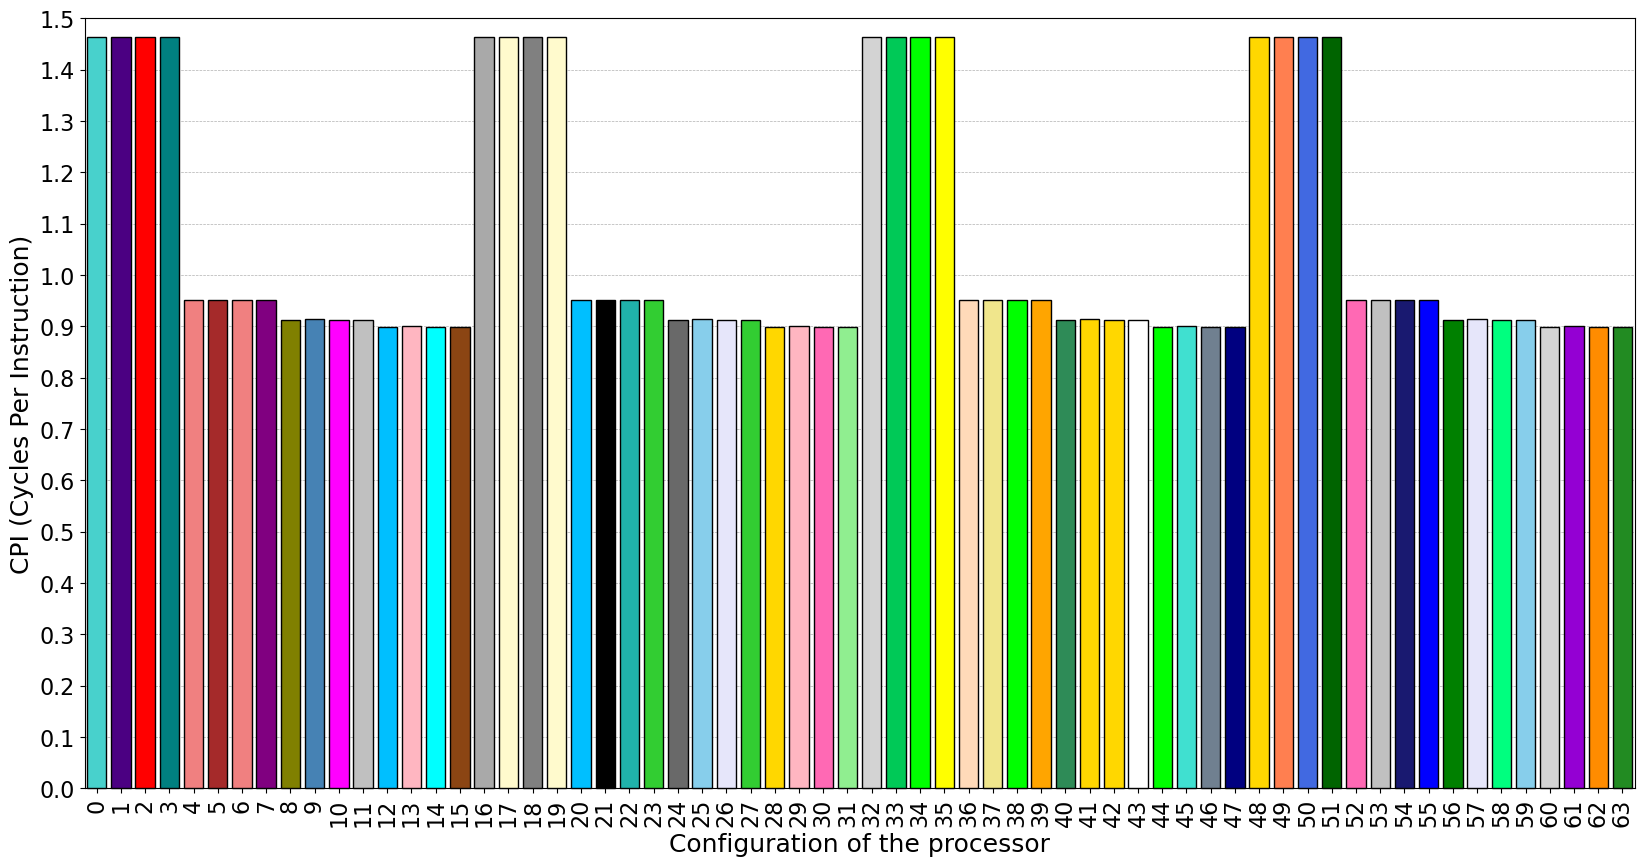

In [8]:
index_fig = 64
legend_labels = []
plt.figure(figsize=(20, 10))
cont = 0
for it, item in enumerate(df['CPI']):
    if it == index_fig:
        break
    if it >= index_fig-64 and it < index_fig:
        valores = obtener_valores(df['label'][it])
        plt.bar(cont, df['CPI'][it], align='center', color=colores[cont],
                edgecolor='black', zorder=3, clip_on=False, 
                label='{}_l2_cache={}, dec_width={}, num_ALU={}'.format(cont, valores[1], valores[2], valores[3]))
        legend_labels.append(mpatches.Patch(color=colores[cont], label='{}_l2_cache={}, dec_width={}, num_ALU={}'.format(cont, valores[1], valores[2], valores[3])))
        cont += 1
plt.xlabel('Configuration of the processor', fontsize=18)
plt.ylabel('CPI (Cycles Per Instruction)', fontsize=18)
plt.xticks(np.arange(0, 64, 1), fontsize=16, rotation=90)
plt.yticks(np.arange(0, 1.51, 0.1), fontsize=16)
plt.xlim(-0.5, 63.5)
plt.ylim(0, 1.5)
plt.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)
plt.savefig('mp3_dec_CPI_1.svg', bbox_inches='tight', pad_inches=0.1, format='svg')
plt.show()

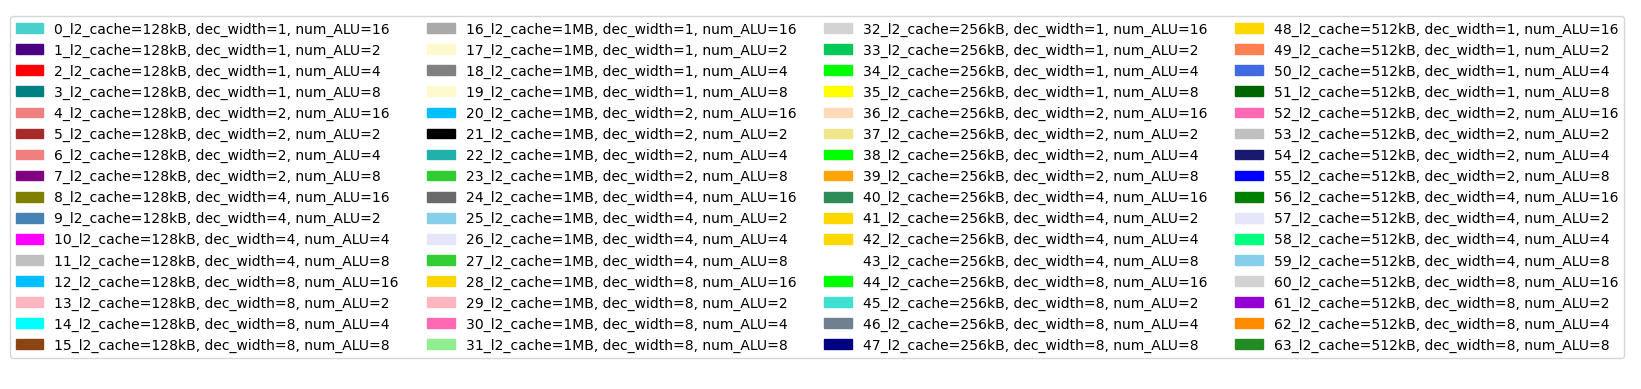

In [9]:
plt.figure()
plt.axis('off')
plt.legend(handles=legend_labels, ncol=4)
plt.savefig('legends_mp3_dec_CPI.svg', bbox_inches='tight', pad_inches=0.1, format='svg')
plt.show()